<a href="https://colab.research.google.com/github/fadillarizalul/thesis-alzheimer/blob/main/alzheimer_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# set up dan inisialisasi

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "fadillarizalul" # username from the json file
os.environ['KAGGLE_KEY'] = "5421cf5f298fedfa046e9db30f9f8ec3" # key from the json file
!kaggle datasets download -d madhucharan/alzheimersdisease5classdatasetadni # api copied from kaggle

 53% 9.00M/16.9M [00:00<00:00, 12.4MB/s]
100% 16.9M/16.9M [00:00<00:00, 22.4MB/s]


In [2]:
!mkdir alzheimersdisease5classdatasetadni
!unzip -qq alzheimersdisease5classdatasetadni.zip -d alzheimer-mri-dataset
!ls alzheimersdisease5classdatasetadni

In [3]:
# creating train and test path of dataset

train_dir = "/content/alzheimer-mri-dataset/Alzheimers-ADNI/train"
test_dir = "/content/alzheimer-mri-dataset/Alzheimers-ADNI/test"

# augmentasi dan split data

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size = (256,256),
    batch_size = 64,
    class_mode = 'categorical',
    subset='training'
)
 
val_generator = valid_datagen.flow_from_directory(
    directory=train_dir,
    target_size = (256,256),
    batch_size = 64,
    class_mode = 'categorical',
    subset='validation'
)

Found 883 images belonging to 5 classes.
Found 218 images belonging to 5 classes.


# create model architecture

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

# model = Sequential()

# # Layer CNN pertama
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150,150,3)))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN kedua
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN ketiga
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# model.summary()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 64)       

## modelling

In [24]:
train_len = 0
for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train'):
    train_len = train_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test'):
    val_len = val_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test',foldername)))

print(train_len)
print(val_len)

1101
195


In [25]:
model_history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 10,
                        verbose = 1)

Epoch 1/10
14/14 [==============================] - 26s 2s/step - loss: 2.0974 - accuracy: 0.3692 - val_loss: 1.4293 - val_accuracy: 0.4495
Epoch 2/10
14/14 [==============================] - 12s 895ms/step - loss: 1.4492 - accuracy: 0.4485 - val_loss: 1.4250 - val_accuracy: 0.4495
Epoch 3/10
14/14 [==============================] - 12s 883ms/step - loss: 1.4256 - accuracy: 0.4473 - val_loss: 1.4140 - val_accuracy: 0.4495
Epoch 4/10
14/14 [==============================] - 13s 898ms/step - loss: 1.4254 - accuracy: 0.4473 - val_loss: 1.4136 - val_accuracy: 0.4495
Epoch 5/10
14/14 [==============================] - 13s 914ms/step - loss: 1.4323 - accuracy: 0.4462 - val_loss: 1.4609 - val_accuracy: 0.4495
Epoch 6/10
14/14 [==============================] - 13s 896ms/step - loss: 1.4240 - accuracy: 0.4462 - val_loss: 1.4296 - val_accuracy: 0.4495
Epoch 7/10
14/14 [==============================] - 13s 900ms/step - loss: 1.4207 - accuracy: 0.4485 - val_loss: 1.4020 - val_accuracy: 0.4495
Ep

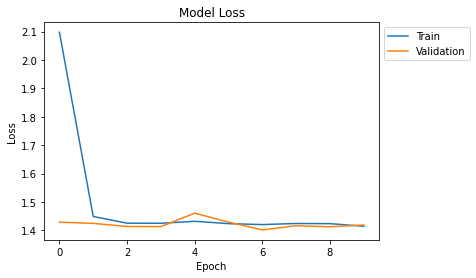

In [26]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

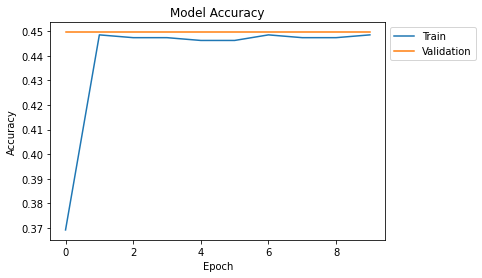

In [27]:
# Summarize history for loss

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [20]:
prediction= model.predict(val_generator, steps=np.ceil(val_generator.samples/val_generator.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=val_generator.classes

4/4 - 1s - 613ms/epoch - 153ms/step


In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

print(classification_report(val_generator.classes, prediction))

ValueError: ignored